# Assignment 2 - part 1

## Feed forward network (multilayer perceptron)

In this assignment you shall develop the complete training and evaluation pipeline for a fully connected feed forward network.
This shall cover all the stages discussed in the course, starting from data preparation and finishing with model evaluation.
You can (you should) use the full functionality of PyTorch and all its packages.

You can write most of your code as standard python scripts and packages outside jupyter notebook.
The calls to the functionality shall, however, be executed from this notebook (not command-line).
All printouts images and comments should be displayed in this notebook.

You shall use this framework to train (at least) 3 feed-forward neural networks and compare their performance:
- first, use only linear layers and non-linearites of your choice. You shall decide on the depth and width of the layers as well as all other hyperparameters as you see fit.
- second, use linear layers, non-linearities and drop-out
- third, use linear layers, non-linearities,  drop-out and batch norm


### Model training and evaluation

Define the function `mlp_train` for training and evaluating an MLP model for classification of **FashionMNIST** data.
The function shall be flexible so that it can take in all necessary hyper-parameters for the training. You shall not fix the hyper-parameters in the code of the function itself as fixed values.

The `mlp_train` function shall return 
* the trained model `mlp_model`
* anything else you deem important or useful for monitoring purposes etc. 

In [2]:
%pip install torchvision

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: torchvision in c:\users\admin\appdata\local\programs\python\python39\lib\site-packages (0.18.1)




[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# DATA Loading
# IMPORTING ALL THE NECCESARY LIBRARIES
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define the transformation for the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the FashionMNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders NOW WE HAVE ALL THE DATA 
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [11]:
#Model Definition
class BasicMLP(nn.Module):

    def __init__(self, input_size, hidden_sizes, output_size):
        super(BasicMLP, self).__init__()
        self.flatten = nn.Flatten()  # Flattens the input data to a 1D tensor
        self.hidden_layers = nn.ModuleList() # A list to hold all the hidden layers
        in_size = input_size
        for h in hidden_sizes:  # Loop through each specified hidden layer size
            self.hidden_layers.append(nn.Linear(in_size, h)) # Add a linear layer
            in_size = h  # Update input size to current layer's output size
        self.output_layer = nn.Linear(in_size, output_size)  # Final layer producing output predictions

    def forward(self, x):
        x = self.flatten(x) # Flatten input data
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))   # Apply ReLU activation function after each layer
        x = self.output_layer(x)  # Output layer without activation 
        return x

class DropoutMLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_rate):
        super(DropoutMLP, self).__init__()
        layers = []
        current_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(current_size, hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))  # Dropout layer after activation
            current_size = hidden_size
        layers.append(nn.Linear(current_size, output_size))
        self.network = nn.Sequential(*layers)  # Using Sequential to chain all layers together

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        return self.network(x)


class BatchNormMLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_rate):
        super(BatchNormMLP, self).__init__()
        layers = []
        current_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(current_size, hidden_size))
            layers.append(nn.BatchNorm1d(hidden_size))  # Batch normalization layer
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            current_size = hidden_size
        layers.append(nn.Linear(current_size, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        return self.network(x)



### Model application

Define a simple utility function `mlp_apply` that uses the train model to classify 10 examples of the test set and displays the 10 images in a grid together with their true and predicted labels.

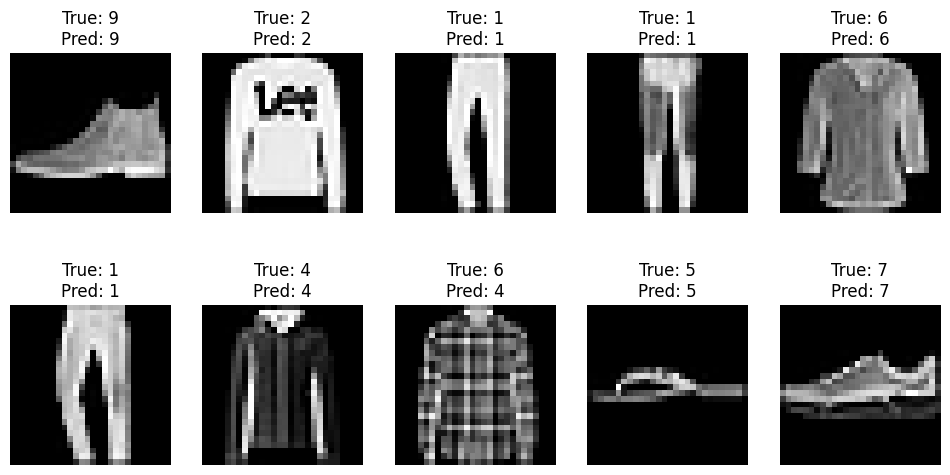

In [8]:
# define function mlp_train so that it can be run from this cel
from cnn_code.helpers import mlp_apply

# user parameters
test_indexes = [0,1,2,3,4,5,6,7,8,9]  # list of 10 indexes - examples to extract from test set
mlp_apply(basic_model, test_loader, test_indexes)
# mlp_apply(mlp_model, test_indexes)

### All experiments for getting high accuracy

### Train and apply model

Use your functions defined above to train the three models. Try different values of the hyper-paramter settings. You shall achieve at least 80% test accuracy with all your models and at least 90% test accuracy with the best one.

Describe briefly your three models and your hyper-parameter setups and comment your results.

**Compare the performance of the three models using suitable supportive tables and graphs, and complemented by relevant comments.**

In [9]:
# define function mlp_train so that it can be run from this cell
from cnn_code.helpers import mlp_train

# Training and Evaluating Models
input_size = 28 * 28
hidden_sizes = [512,256, 128]
output_size = 10
num_epochs = 32
learning_rate = 0.001
dropout_rate = 0.34

# 1. Basic MLP
basic_model = BasicMLP(input_size, hidden_sizes, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(basic_model.parameters(), lr=learning_rate)
basic_model, basic_train_losses, basic_test_losse, basic_train_accuracy,basic_test_accuracy   = mlp_train(basic_model, train_loader, test_loader, criterion, optimizer, num_epochs)


# 2. Dropout MLP
dropout_model = DropoutMLP(input_size, hidden_sizes, output_size, dropout_rate)
optimizer = optim.Adam(dropout_model.parameters(), lr=learning_rate)
dropout_model, dropout_train_losses, dropout_test_losses,dropout_train_accuracy,dropout_test_accuracy = mlp_train(dropout_model, train_loader, test_loader, criterion, optimizer, num_epochs)


# 3. BatchNorm + Dropout MLP
batchnorm_model = BatchNormMLP(input_size, hidden_sizes, output_size, dropout_rate)
optimizer = optim.Adam(batchnorm_model.parameters(), lr=learning_rate)
batchnorm_model, batchnorm_train_losses, batchnorm_test_losses,batchnorm_train_accuracy,batchnorm_test_accuracy= mlp_train(batchnorm_model, train_loader, test_loader, criterion, optimizer, num_epochs)


Epoch [1/32], Train Loss: 0.4992, Train Accuracy: 0.8158, Test Loss: 0.4161, Test Accuracy: 0.8474
Epoch [2/32], Train Loss: 0.3725, Train Accuracy: 0.8626, Test Loss: 0.4246, Test Accuracy: 0.8509
Epoch [3/32], Train Loss: 0.3332, Train Accuracy: 0.8780, Test Loss: 0.3874, Test Accuracy: 0.8583
Epoch [4/32], Train Loss: 0.3054, Train Accuracy: 0.8865, Test Loss: 0.3581, Test Accuracy: 0.8698
Epoch [5/32], Train Loss: 0.2866, Train Accuracy: 0.8936, Test Loss: 0.3394, Test Accuracy: 0.8788
Epoch [6/32], Train Loss: 0.2691, Train Accuracy: 0.9002, Test Loss: 0.3340, Test Accuracy: 0.8777
Epoch [7/32], Train Loss: 0.2541, Train Accuracy: 0.9039, Test Loss: 0.3683, Test Accuracy: 0.8743
Epoch [8/32], Train Loss: 0.2413, Train Accuracy: 0.9103, Test Loss: 0.3355, Test Accuracy: 0.8821
Epoch [9/32], Train Loss: 0.2312, Train Accuracy: 0.9126, Test Loss: 0.3403, Test Accuracy: 0.8825
Epoch [10/32], Train Loss: 0.2216, Train Accuracy: 0.9164, Test Loss: 0.3480, Test Accuracy: 0.8847
Epoch [11

#### Conclusion

*  After 32 epoch we are getting test accuracy of 90.20%.
*  To increase the accuracy we can use hyperparameter tuning and after doing it we have finalize our parameters and using that parameters we have the best accuracy.
*  We can see that from the results we have recieved that the test loss is gradually decreasing and test acuracy is increasing which is good for performance.